In [157]:

#Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse


In [158]:
import pandas as pd
df = pd.read_csv(r'C:\Users\abhis\Desktop\Priyanka MS GSU\DataProgramming\Project\CustomerChurn_Prepocessed.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


#### Binary Features

In [159]:
# Binary Features - Gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling
# We will check how each of these variables impact the preduction power of our models by looking at the distribution of data

print(df[['gender','Churn']].groupby(['gender']).mean())
print(df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print(df[['Partner','Churn']].groupby(['Partner']).mean())
print(df[['Dependents','Churn']].groupby(['Dependents']).mean())
print(df[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print(df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())

#Average churn rate for males and females are approximately the same, so we will not use this variable in our model
#Average for people with phone service and no phone service are approximately the same, so we will not use this variable in our model
#For the other binary features since we have significant difference in the distribution of data, we will be using
#those in our model


           Churn
gender          
0       0.269209
1       0.261603
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
0        0.329580
1        0.196649
               Churn
Dependents          
0           0.312791
1           0.154502
                 Churn
PhoneService          
0             0.249267
1             0.267096
                     Churn
PaperlessBilling          
0                 0.163301
1                 0.335651


#### Categorical Features

In [160]:
# Categorical Features 
# 'InternetService' - StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport
# There variables come into play if customer has internet service

print(df[['InternetService','Churn']].groupby(['InternetService']).mean())

#0 - DSL
#1 - FiberOptic
#2 - No
#Customers with fiber optic internet service are much likely to churn than other customers.
#So internet service variable is definitely important in predicting churn rate

                    Churn
InternetService          
0                0.189591
1                0.418928
2                0.074050


In [161]:
print(df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean())
print(df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean())
print(df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean())
print(df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean())
print(df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean())
print(df[['TechSupport','Churn']].groupby(['TechSupport']).mean())

#All internet service related features seem to have different churn rates for their classes 
#because churn rate changes according to customers having these services.
#So, we will use all of these categorical fatures in our models

                Churn
StreamingTV          
0            0.335231
1            0.074050
2            0.300702
                    Churn
StreamingMovies          
0                0.336804
1                0.074050
2                0.299414
                   Churn
OnlineSecurity          
0               0.417667
1               0.074050
2               0.146112
                 Churn
OnlineBackup          
0             0.399288
1             0.074050
2             0.215315
                     Churn
DeviceProtection          
0                 0.391276
1                 0.074050
2                 0.225021
                Churn
TechSupport          
0            0.416355
1            0.074050
2            0.151663


In [162]:
print(df[['Contract','Churn']].groupby(['Contract']).mean())
print(df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean())
print(df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean())

#Customers with short-term contract are more likely to churn (0 - Month to month, 1 - One year, 2 - Two year)
#Customers who pay with electronic check are more likely to churn (0- Bank Transfer, 1 - CreditCard, 2 - ElectronicCheck, 3 - MailCheck)

             Churn
Contract          
0         0.427097
1         0.112695
2         0.028319
                  Churn
PaymentMethod          
0              0.167098
1              0.152431
2              0.452854
3              0.191067
                  Churn
MultipleLines          
0              0.250442
1              0.249267
2              0.286099


#### Continous Features

In [163]:
print(df[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean())

#It seems like 'MonthlyCharges' & 'tenure' also have an effect on churn rate

          tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


In [164]:
print(df[['Contract','tenure']].groupby(['Contract']).mean())

#'tenure' & 'Contract' seem to be highly corelated. So we will not use 'Contract' in our models

             tenure
Contract           
0         18.036645
1         42.044807
2         56.735103


#### Dropping all the unnecessary variables from our data set

In [165]:
df.drop(['gender','PhoneService','Contract'], axis=1, inplace=True)
df.head()

,Unnamed: 0,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,7590-VHVEG,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,0
1,1,5575-GNVDE,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,0
2,2,3668-QPYBK,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,1
3,3,7795-CFOCW,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,0
4,4,9237-HQITU,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,1


In [166]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,0
1,5575-GNVDE,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,0
2,3668-QPYBK,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,1
3,7795-CFOCW,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,0
4,9237-HQITU,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,1


In [167]:
#Before moving with the ML alorithms, we split dataset into dependent and independent variables

y = df["Churn"] #Target variable

X = df.drop(columns="Churn") #Dependent variables

In [168]:
#Generating the training and test datasets of dependent and independent variables
#Ratio 80:20 used for split between train & test data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 16)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 16)
Number transactions y_test dataset:  (1409,)


In [169]:
#Separate ‘customerID’ from training and test data frames.

train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])


In [170]:
df["Churn"].value_counts()

#Imbalanced class distributions influence the performance of a machine learning model negatively.

0    5174
1    1869
Name: Churn, dtype: int64

C:\Users\abhis\Anaconda3\envs\Programming\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn Distribution')

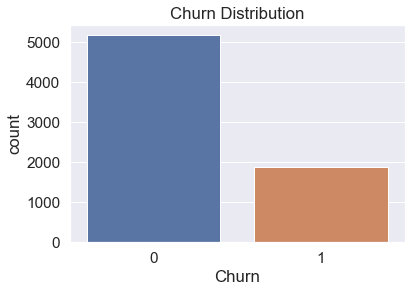

In [171]:
sns.countplot('Churn', data=df).set_title('Churn Distribution')

In [172]:
#Using SMOTE to balance the data
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

columns = X_train.columns
bal_X_train,bal_y_train=os.fit_resample(X_train, y_train)
bal_X_train = pd.DataFrame(data=bal_X_train,columns=columns)
bal_y_train= pd.DataFrame(data=bal_y_train,columns=['Churn'])

print("length of oversampled data is ",len(bal_X_train))
print("Number of no churn oversampled data",len(bal_y_train[bal_y_train['Churn']==0]))
print("Number of churn",len(bal_y_train[bal_y_train['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(bal_y_train[bal_y_train['Churn']==0])/len(bal_X_train))
print("Proportion of churn data in oversampled data is ",len(bal_y_train[bal_y_train['Churn']==1])/len(bal_X_train))

length of oversampled data is  8278
Number of no churn oversampled data 4139
Number of churn 4139
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [173]:
X_train, X_test, y_train, y_test = train_test_split(bal_X_train, bal_y_train,
                                                    stratify=bal_y_train, 
                                                    test_size = 0.1,
                                                    random_state = 0)

### Model Selection

In [174]:
#Compare Baseline Classification Algorithms - First Iteration
#Here we have taken models that predict the independent variables that are CATEGORICAL in nature like Logistic regression,SVC, Kernel SVM, KNN, Gaussian NB, Decision Tree Model and Random Forest
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = None,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = None)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = None)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state =None)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state =None)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train.values.ravel(), cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,91.52,0.88,84.04,1.10
3,KNN,87.58,1.11,79.95,1.38
0,Logistic Regression,85.69,0.97,78.12,1.71
1,SVC,85.57,0.97,77.65,1.45
2,Kernel SVM,84.26,1.10,75.83,1.26
4,Gaussian NB,84.12,1.38,76.91,1.07
5,Decision Tree Classifier,80.14,1.30,80.27,1.09


In [193]:
### Next, we will try to scale our variables to check if it impacts the perofmance of our models

### Scaling the input variables  using Standard Scalar

In [176]:
#Since all our features are not on the same scale, we will be using scaling to bring them to the same scale
#Feature Scaling to standardize the data

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [177]:
#Running all the models again on the Scaled data

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = None,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = None)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = None)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state =None)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state =None)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train.values.ravel(), cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,91.50,0.79,84.13,0.93
2,Kernel SVM,88.27,0.91,80.08,0.99
0,Logistic Regression,85.69,0.97,78.11,1.66
1,SVC,85.56,0.98,77.69,1.45
3,KNN,84.84,1.33,77.76,1.38
4,Gaussian NB,84.12,1.38,76.91,1.07
5,Decision Tree Classifier,80.14,1.18,80.24,1.17


In [ ]:
### We don't see any siginificant improvement in the model performance after scaling the features 

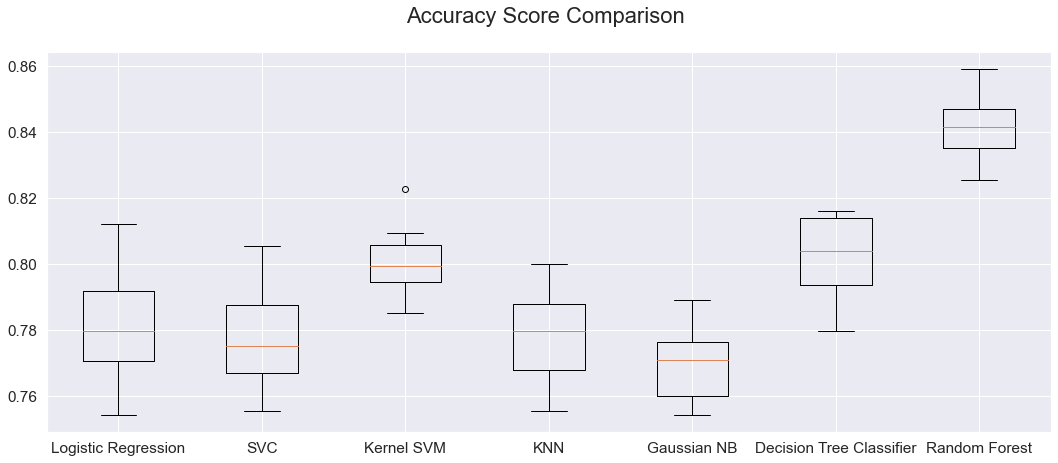

In [183]:
# Visualize Classification Algorithms Accuracy Comparisons
  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

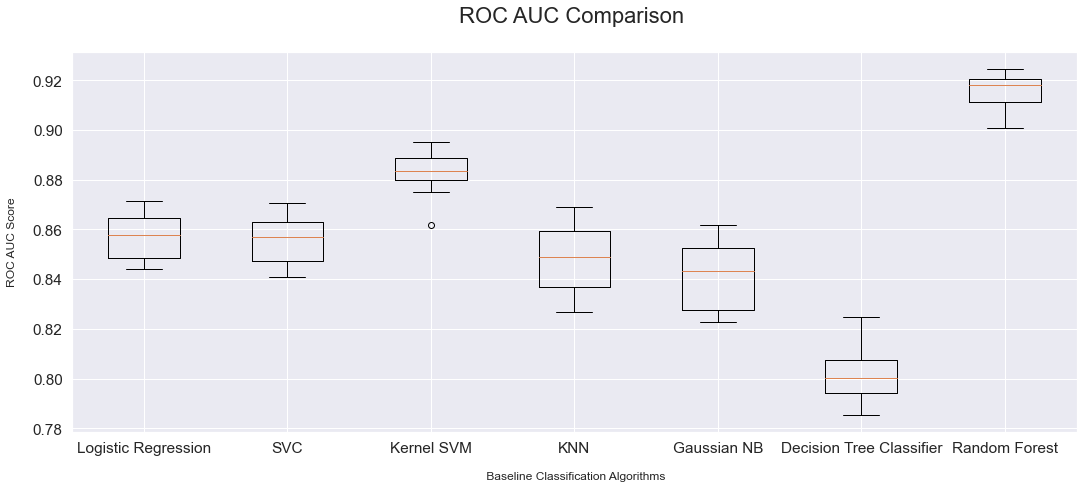

In [184]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

### Here we see that Random Forest has the highest accuracy mean and ROC AUC mean
### So, we are more inclined to select this as the best fitted model

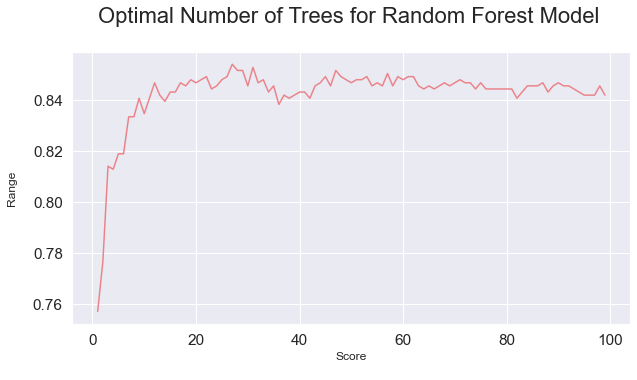

In [185]:
#find the optimal number of decision trees to compose the best random forest
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train.values.ravel())
    score_array.append(rf_loop.score(X_test,y_test.values.ravel()))
 
fig = plt.figure(figsize=(10, 5))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#As we could see from the iterations above, 
#the random forest model would attain the highest accuracy score when its n_estimators is between 27


In [186]:
#Since we have chosen Random Forest, we train & evaluate chosen Model
#Fitting Random Forest to the Training set:
# Tried for values between 25-30 for n_estimators, 27 gives best results   
classifier = RandomForestClassifier(n_estimators = 27,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train.values.ravel())
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
#Evaluate results
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (model_results)


           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.839372    0.83693  0.842995  0.839952  0.841775


In [187]:
y_pred = classifier.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

#We have chosen a model with an accuracy of about 84%

Accuracy of random forest classifier on test set: 0.84


### Evaluation Metrics

#### Confusion Matrix : Confusion Matrix gives us a matrix as output and describes the complete performance of the model

Text(0.5, 8.5, 'Predicted label\n')

<Figure size 360x360 with 0 Axes>

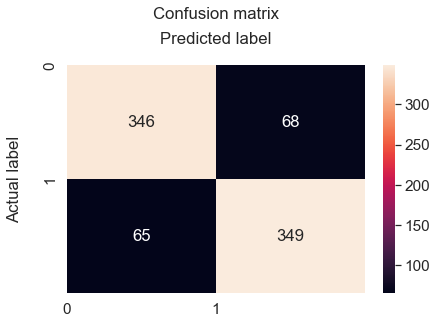

In [194]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (5,5))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

#The Confusion matrix indicates that we have 346+349 correct predictions and 65+68 incorrect predictions.

In [189]:
print("classification_error")
print(1 - metrics.accuracy_score(y_test, y_pred))

classification_error
0.16062801932367154


#### ROC Graph : ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score

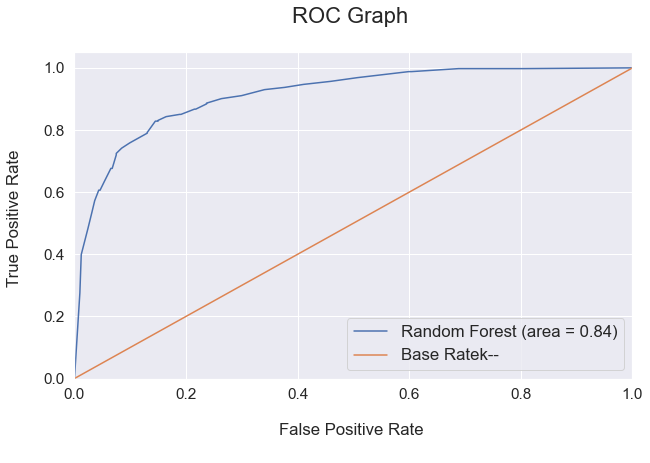

In [190]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train.values.ravel()) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

#ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score. 
#Our Random Forest model showcased a higher AUC score as we can see from the below plot.

In [191]:
#We need customerId to be able to create propensity score table
#Joining X_test with test_identity to get the customerId for each row
final_results1 = X_test.join(test_identity,how="left")
final_results1

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,customerID
6882,-0.414430,-0.782881,-0.525681,0.407501,-0.999183,-1.244791,-0.756539,-0.884254,0.259895,1.725657,-1.033689,1.166703,0.796998,1.420845,-0.133918,NaN
6732,-0.414430,-0.782881,-0.525681,-0.886639,-0.999183,0.225357,-0.756539,0.270064,-0.890561,-0.744541,-1.033689,1.166703,-1.254708,0.416548,0.576808,NaN
5136,2.412953,1.277333,-0.525681,1.785135,1.133744,-1.244791,1.697724,1.424381,1.410352,1.725657,1.182103,1.166703,-1.254708,-0.587750,0.785252,NaN
5087,-0.414430,1.277333,1.902294,1.451163,1.133744,0.225357,1.697724,-0.884254,-0.890561,-0.744541,1.182103,1.166703,0.796998,-1.592048,1.171228,8739-QOTTN
993,-0.414430,-0.782881,-0.525681,-1.095371,-0.999183,1.695505,0.470592,0.270064,0.259895,0.490558,0.074207,0.055060,-1.254708,1.420845,-1.643615,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,-0.414430,-0.782881,-0.525681,-1.095371,-0.999183,0.225357,-0.756539,-0.884254,-0.890561,-0.744541,-1.033689,-1.056583,0.796998,0.416548,0.060243,NaN
5612,-0.414430,-0.782881,-0.525681,-0.803146,-0.999183,-1.244791,1.697724,-0.884254,-0.890561,-0.744541,-1.033689,-1.056583,0.796998,0.416548,-0.612607,NaN
1169,-0.414430,-0.782881,-0.525681,-1.011878,-0.999183,-1.244791,-0.756539,-0.884254,-0.890561,-0.744541,-1.033689,-1.056583,0.796998,0.416548,-0.769084,NaN
138,-0.414430,-0.782881,-0.525681,-1.053625,-0.999183,1.695505,0.470592,0.270064,0.259895,0.490558,0.074207,0.055060,-1.254708,1.420845,-1.671433,NaN


In [192]:
#Forming the propensity score table to compare the model results vs the actual values
# This also gives us the probability of a customer to churn

final_results = pd.concat([final_results1, y_test], axis = 1)
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results.dropna()
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
print (final_results)

      customerID  Churn  predictions  propensity_to_churn(%)
5087  8739-QOTTN      0            0                   11.11
2160  7101-HRBLJ      0            0                   33.33
3104  6860-YRJZP      1            1                  100.00
3884  4521-YEEHE      0            0                   25.93
6731  0164-XAIRP      1            1                   92.59
...          ...    ...          ...                     ...
2494  1596-BBVTG      1            0                   14.81
4486  7251-XFOIL      1            0                   37.65
6555  8969-PRHFK      1            1                   70.37
2866  7517-LDMPS      0            0                   25.93
1406  9337-SRRNI      1            1                   92.59

[134 rows x 4 columns]
